# Exploračná analýza dát a štatistické charakteristiky

### Načítanie knižníc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Načítanie dát

In [2]:
df = pd.read_csv('data/Train_data.csv')

### Deskriptívna analýza

In [3]:
df.shape

(25192, 42)

### Štatistické informácie o kvantitatívnych atribútoch

In [4]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Základné informácie o atribútoch

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

### Zistenie počtu chýbajúcich hodnôt

In [6]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Zistenie počtu duplikátov

In [7]:
print(df.duplicated().sum())

0


### Histogramy

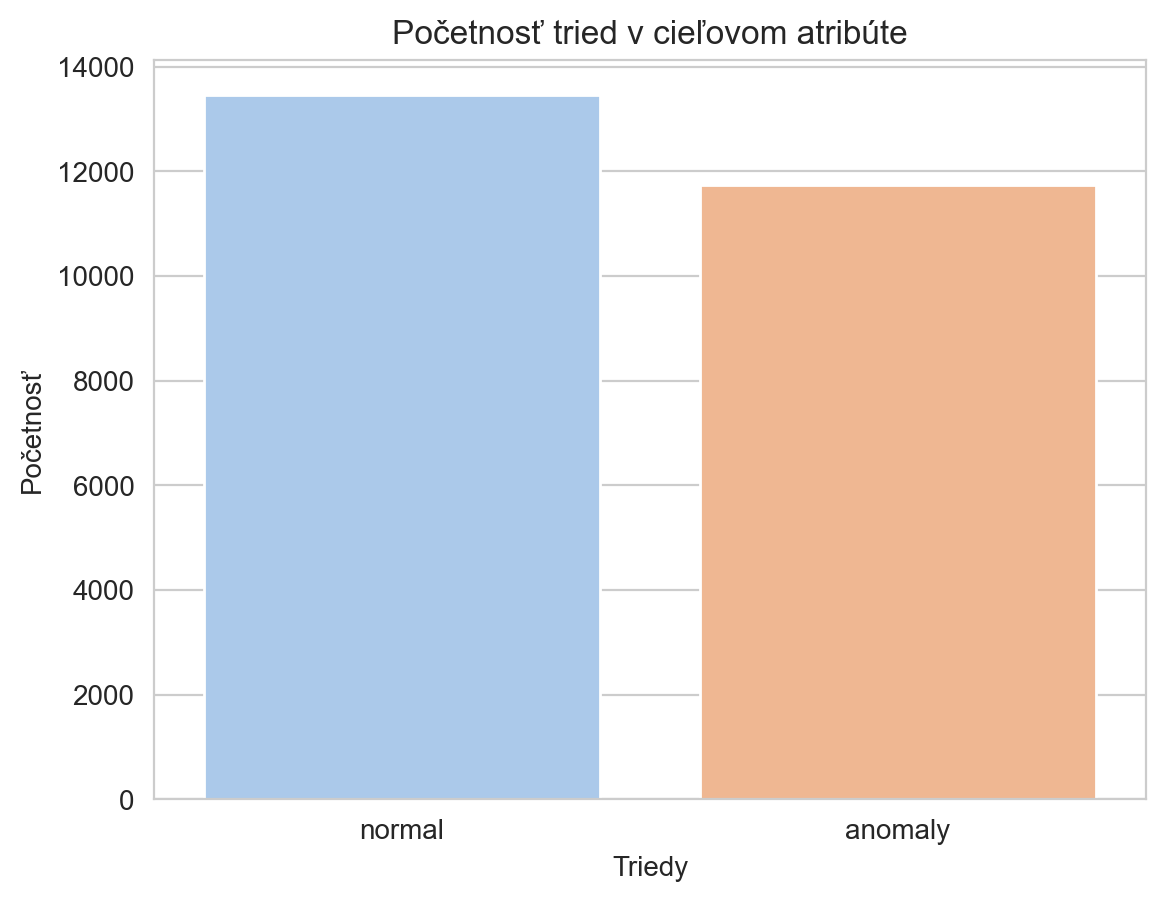

In [8]:
class_count = df['class'].value_counts().reset_index()
class_count.columns = ['class', 'count']

plt.figure(dpi=200)
sns.barplot(x='class', y='count', data=class_count, palette='pastel', hue='class', legend=False)
plt.title('Početnosť tried v cieľovom atribúte')
plt.xlabel('Triedy')
plt.ylabel('Početnosť')
plt.show()

<Axes: xlabel='protocol_type', ylabel='Count'>

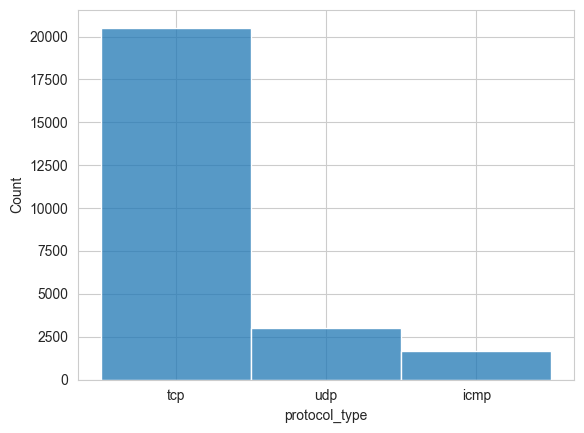

In [9]:
sns.histplot(df['protocol_type'])

<Axes: xlabel='flag', ylabel='Count'>

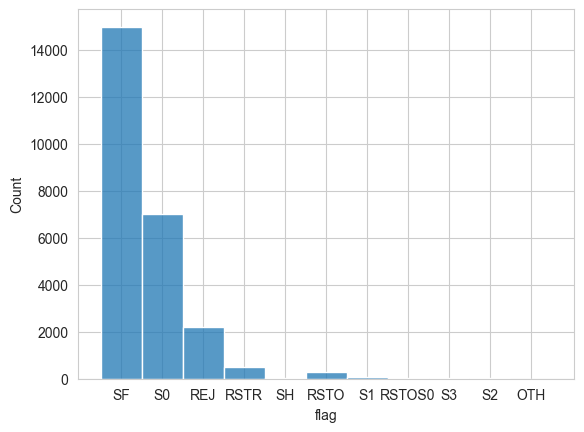

In [10]:
sns.histplot(df['flag'])

In [11]:
(df['service'].value_counts())

service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64

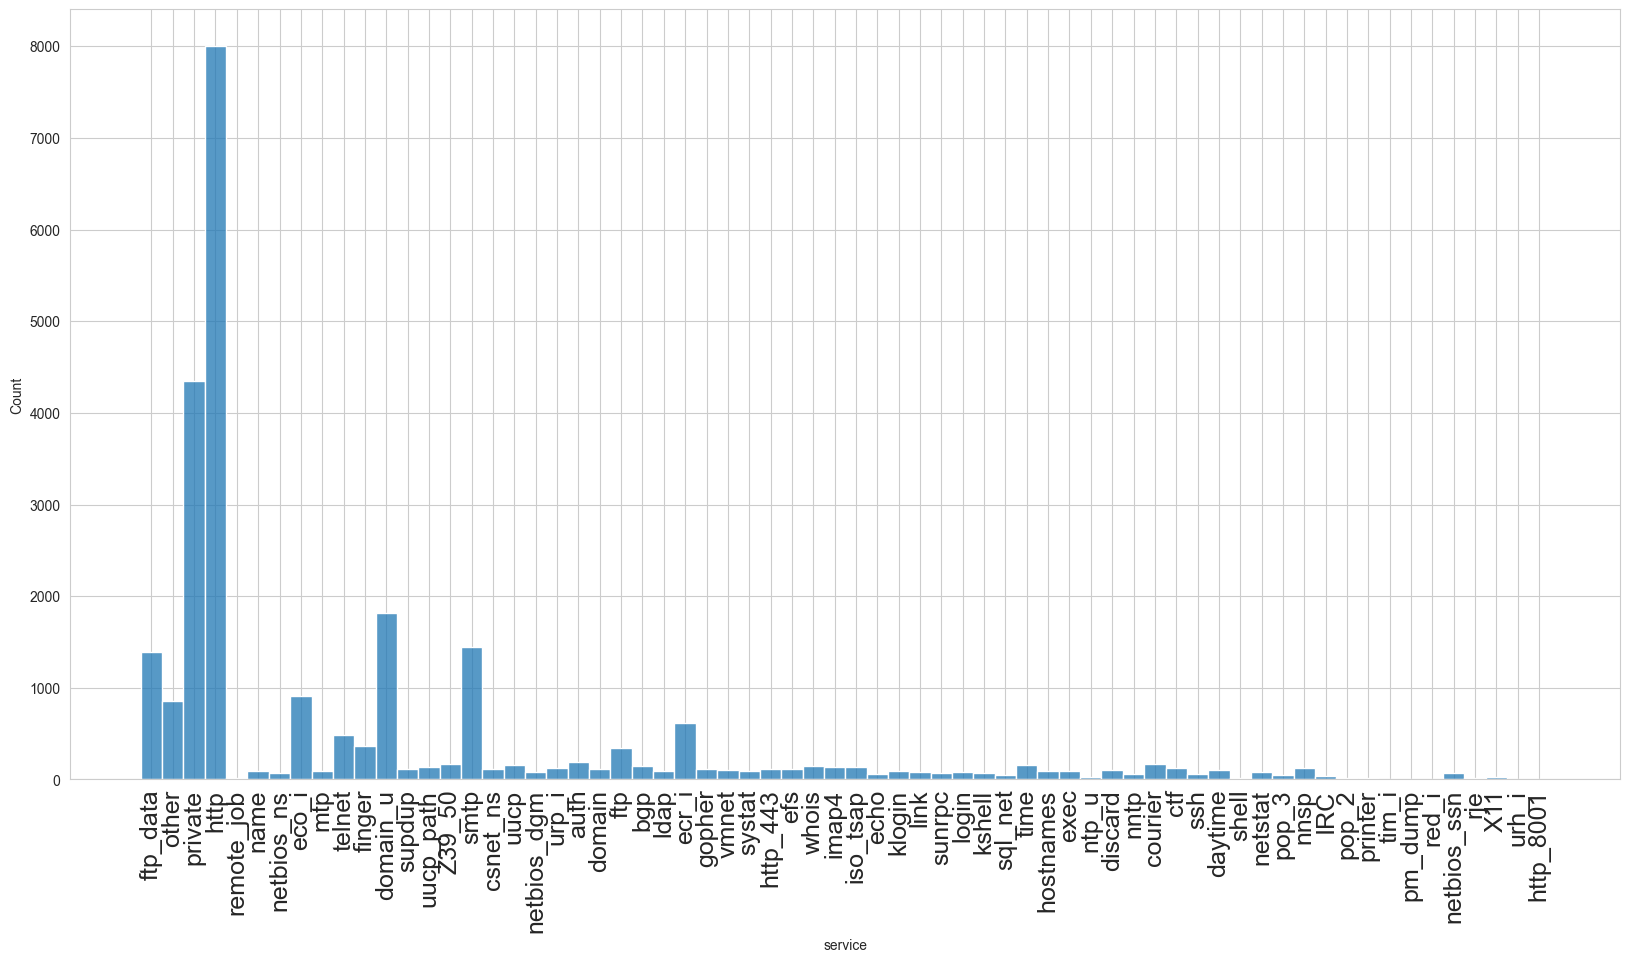

In [12]:
plt.figure(figsize = (20,10))
sns.histplot(df['service'])
plt.xticks(rotation = 90)
plt.xticks(fontsize=18)
plt.show()

### Graf početnosti pre kategorické atribúty

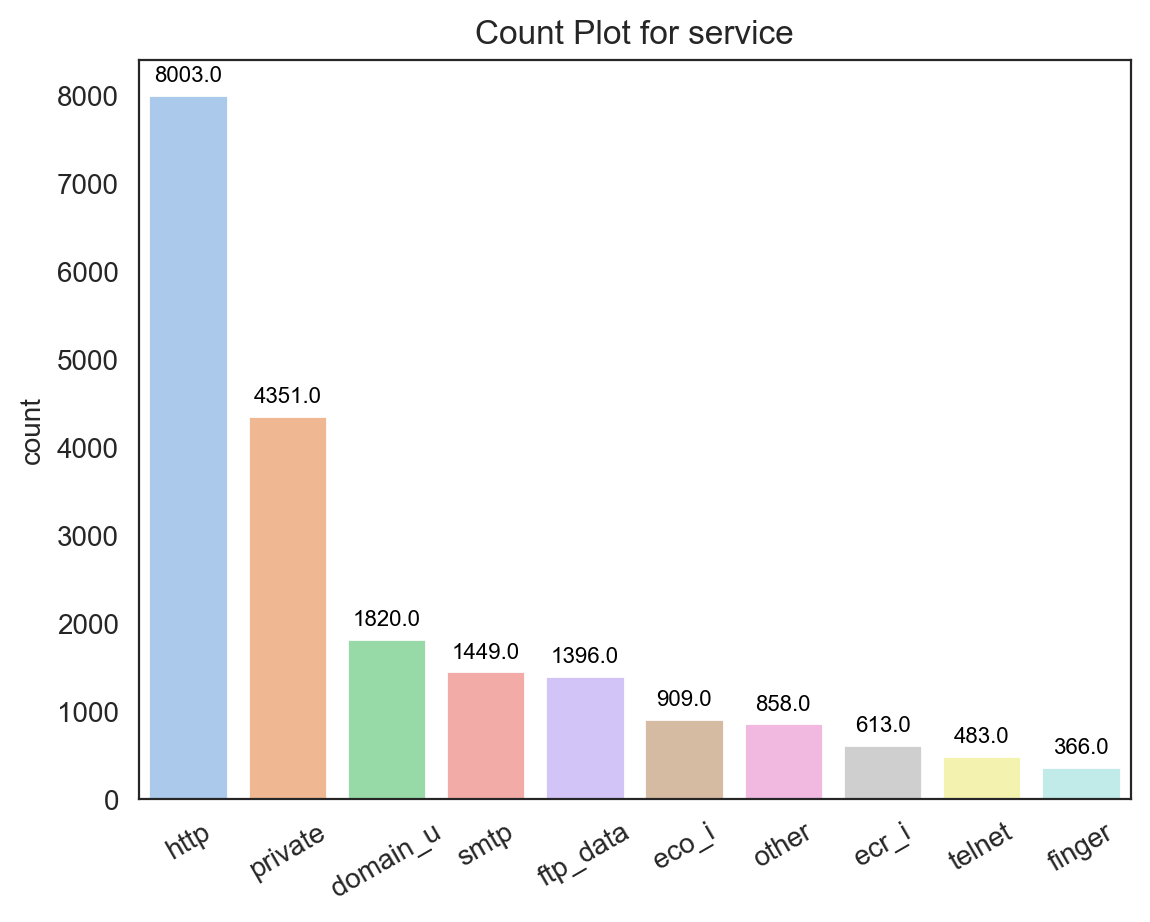

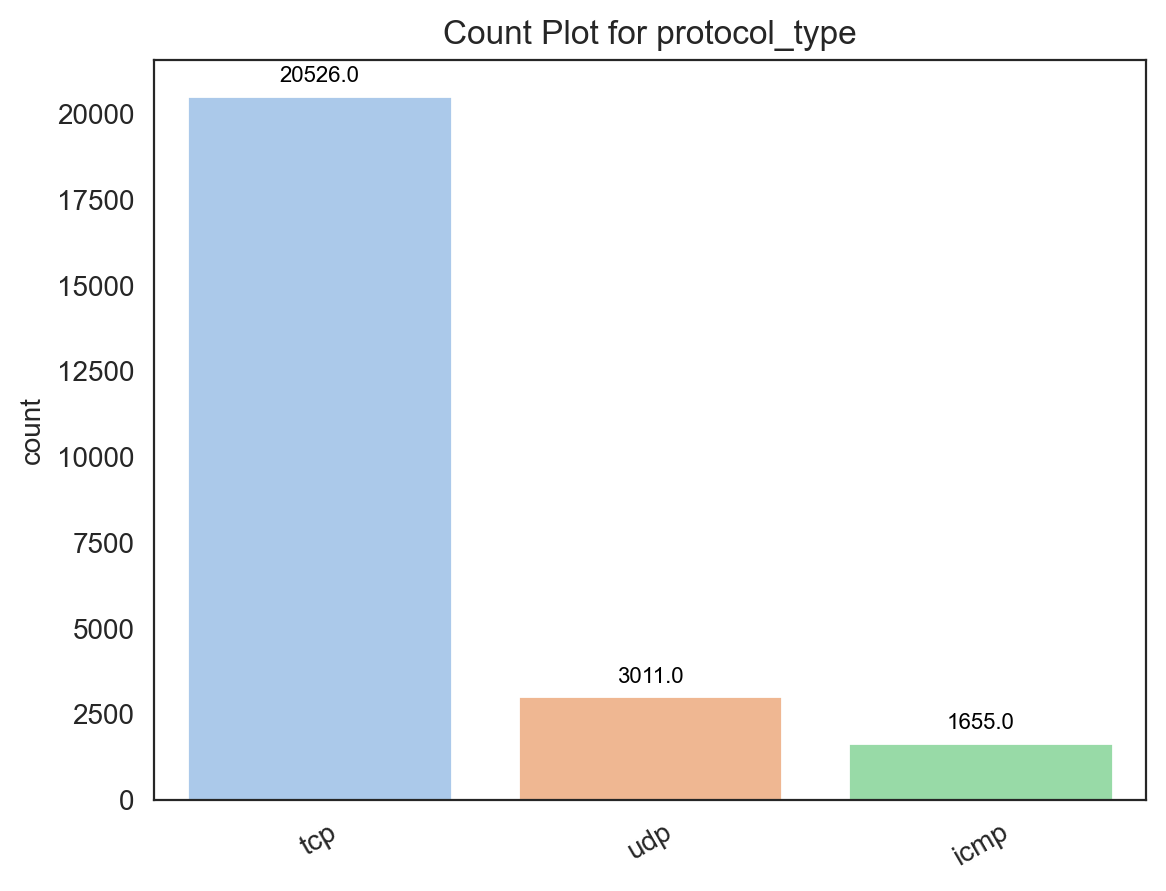

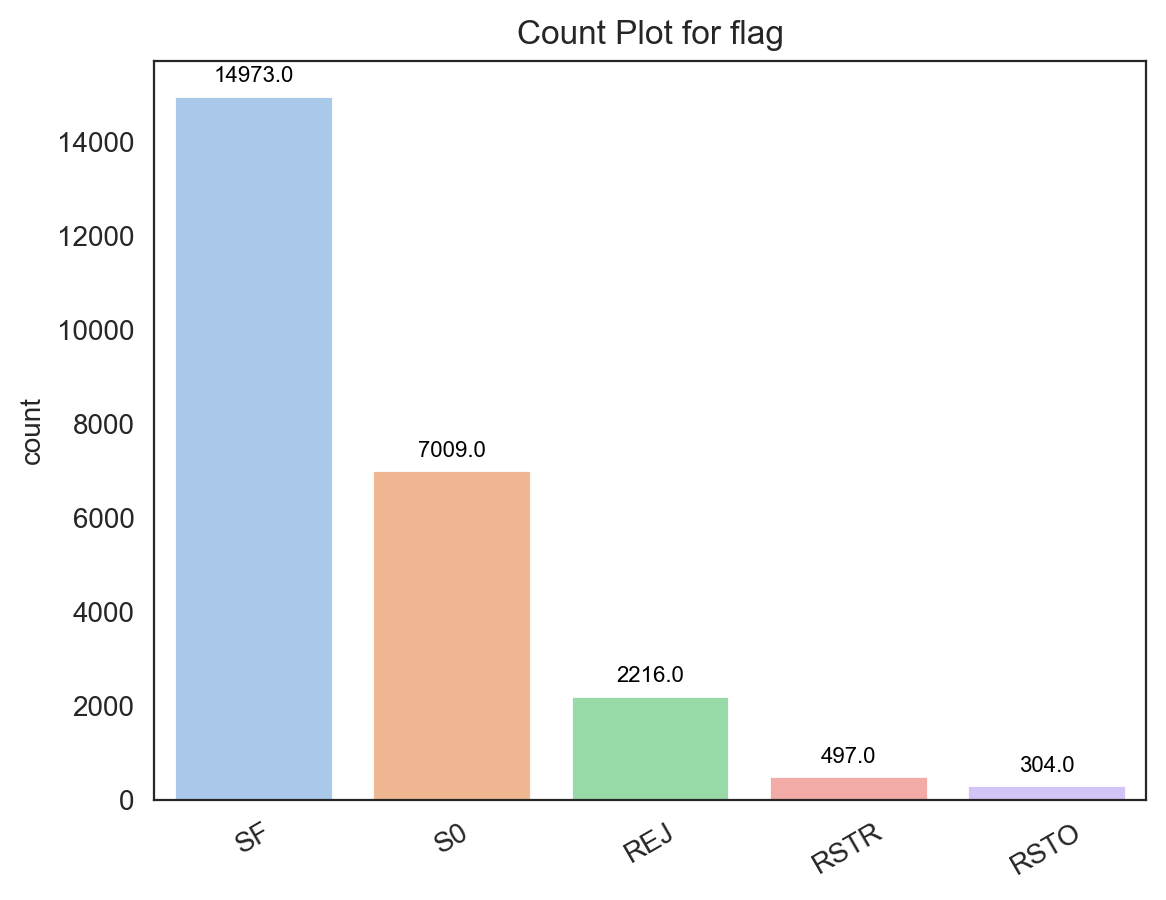

In [37]:
categorical_columns = df.select_dtypes(include=['object']).columns.sort_values(ascending=False)

# Get top service and flag values
service_values = df['service'].value_counts().head(10).index
flag_values = df['flag'].value_counts().head(5).index

# Filter DataFrame for top service and flag values
df_service = df[df['service'].isin(service_values)]
df_flag = df[df['flag'].isin(flag_values)]

for col in categorical_columns:
    plt.figure(dpi=200)
    if col == 'service':
        sort_df = df_service[col].value_counts().sort_values(ascending=False).index
        ax = sns.countplot(x=pd.Categorical(df_service[col], categories=sort_df, ordered=True), hue=pd.Categorical(df_service[col], categories=sort_df, ordered=True), palette='pastel', legend=False)
    elif col == 'flag':
        sort_df = df_flag[col].value_counts().sort_values(ascending=False).index
        ax = sns.countplot(x=pd.Categorical(df_flag[col], categories=sort_df, ordered=True), hue=pd.Categorical(df_flag[col], categories=sort_df, ordered=True), palette='pastel', legend=False)
    else:
        sort_df = df[col].value_counts().sort_values(ascending=False).index
        ax = sns.countplot(x=pd.Categorical(df[col], categories=sort_df, ordered=True), hue=pd.Categorical(df[col], categories=sort_df, ordered=True), palette='pastel', legend=False)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=30)

    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.show()

### Graf početnosti voči cieľovému atribútu pre kategorické atribúty

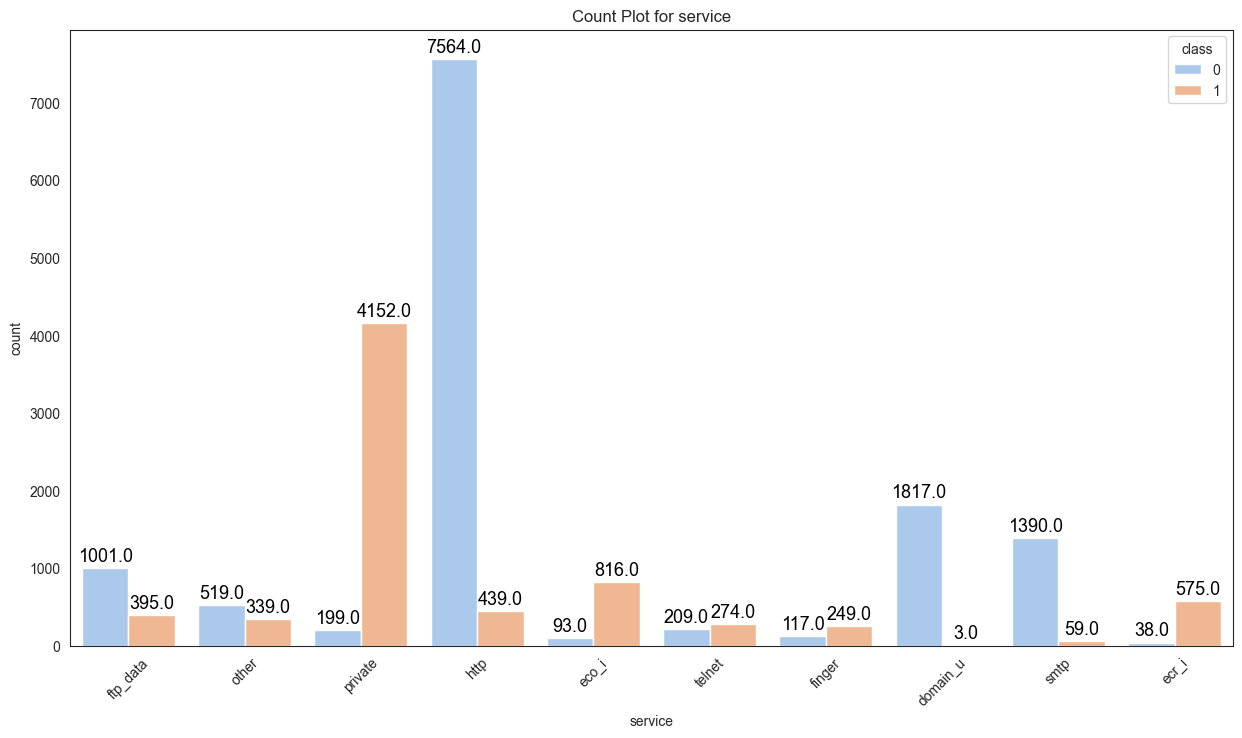

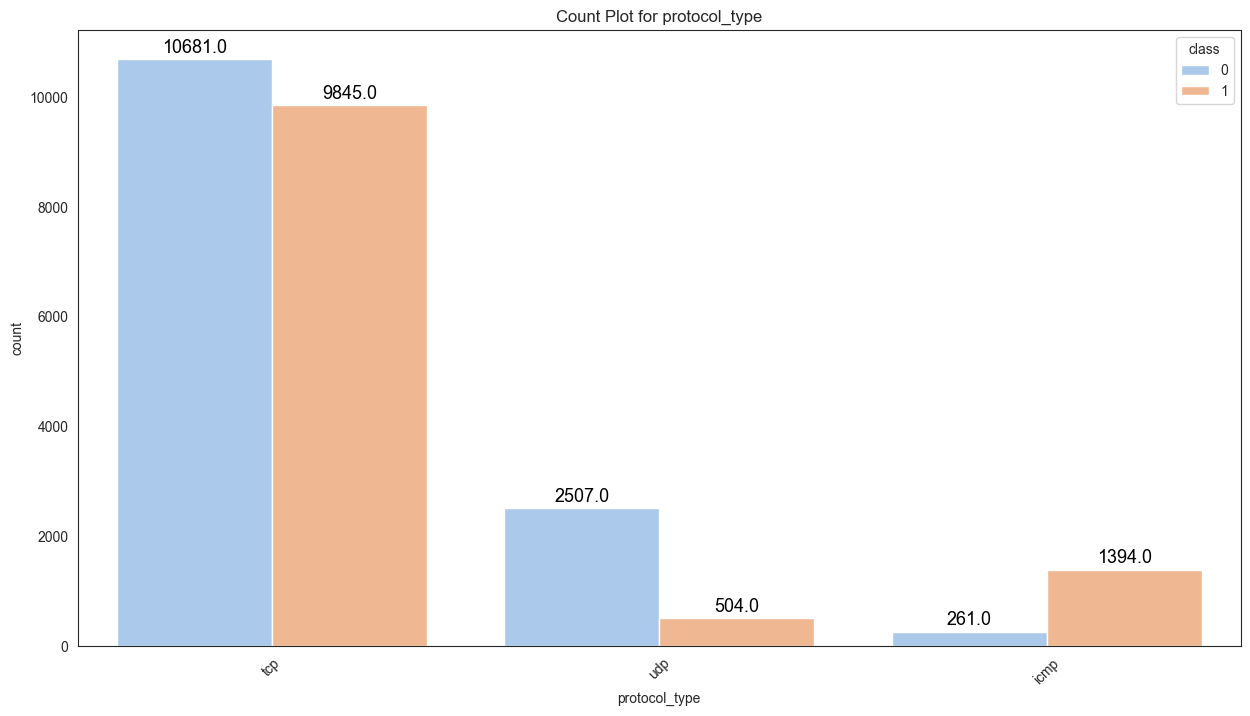

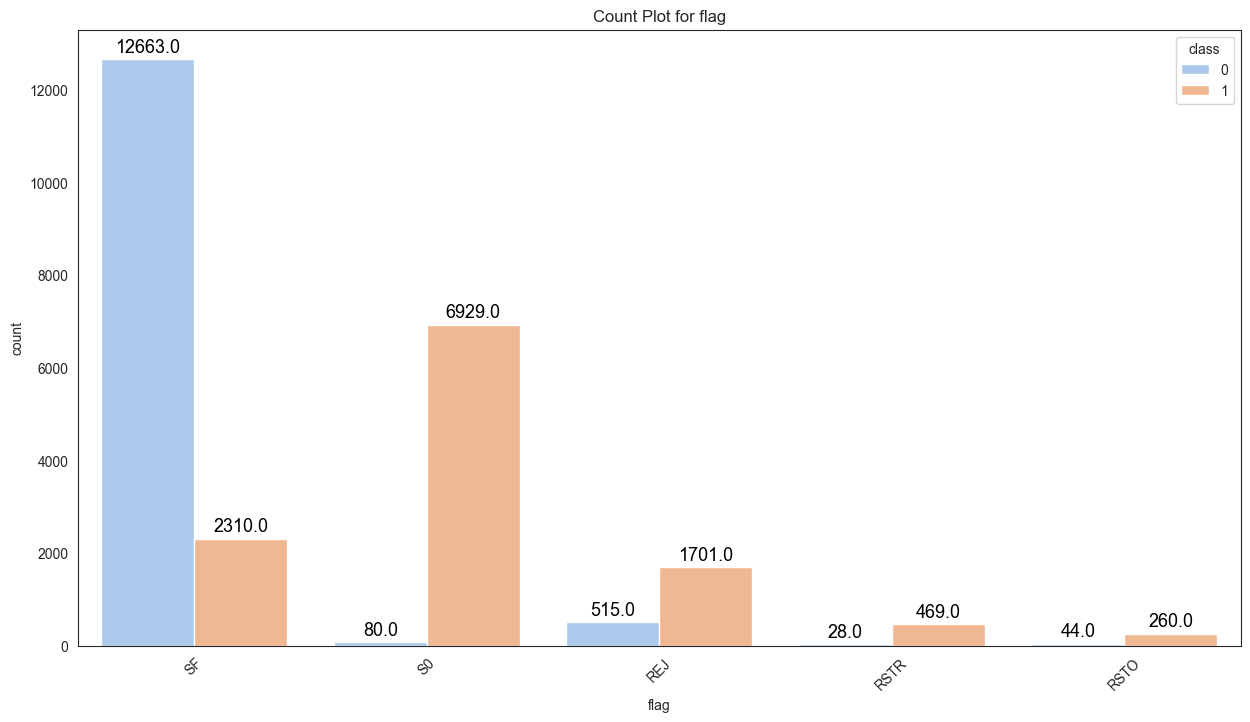

In [38]:
for col in categorical_columns:
    plt.figure(figsize=(15, 8))
    if col == 'service':
        ax = sns.countplot(x=df_service[col], hue=df_service['class'], palette='pastel')
    elif col == 'flag':
        ax = sns.countplot(x=df_flag[col], hue=df_flag['class'], palette='pastel')
    else:
        ax = sns.countplot(x=df[col], hue=df['class'], palette='pastel')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=13, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.show()

### Korelačná analýza

In [14]:
df['class'] = df['class'].map({'normal': 0, 'anomaly': 1})
df_num = df.select_dtypes(include = ['float64', 'int64'])

#### Korelačná matica

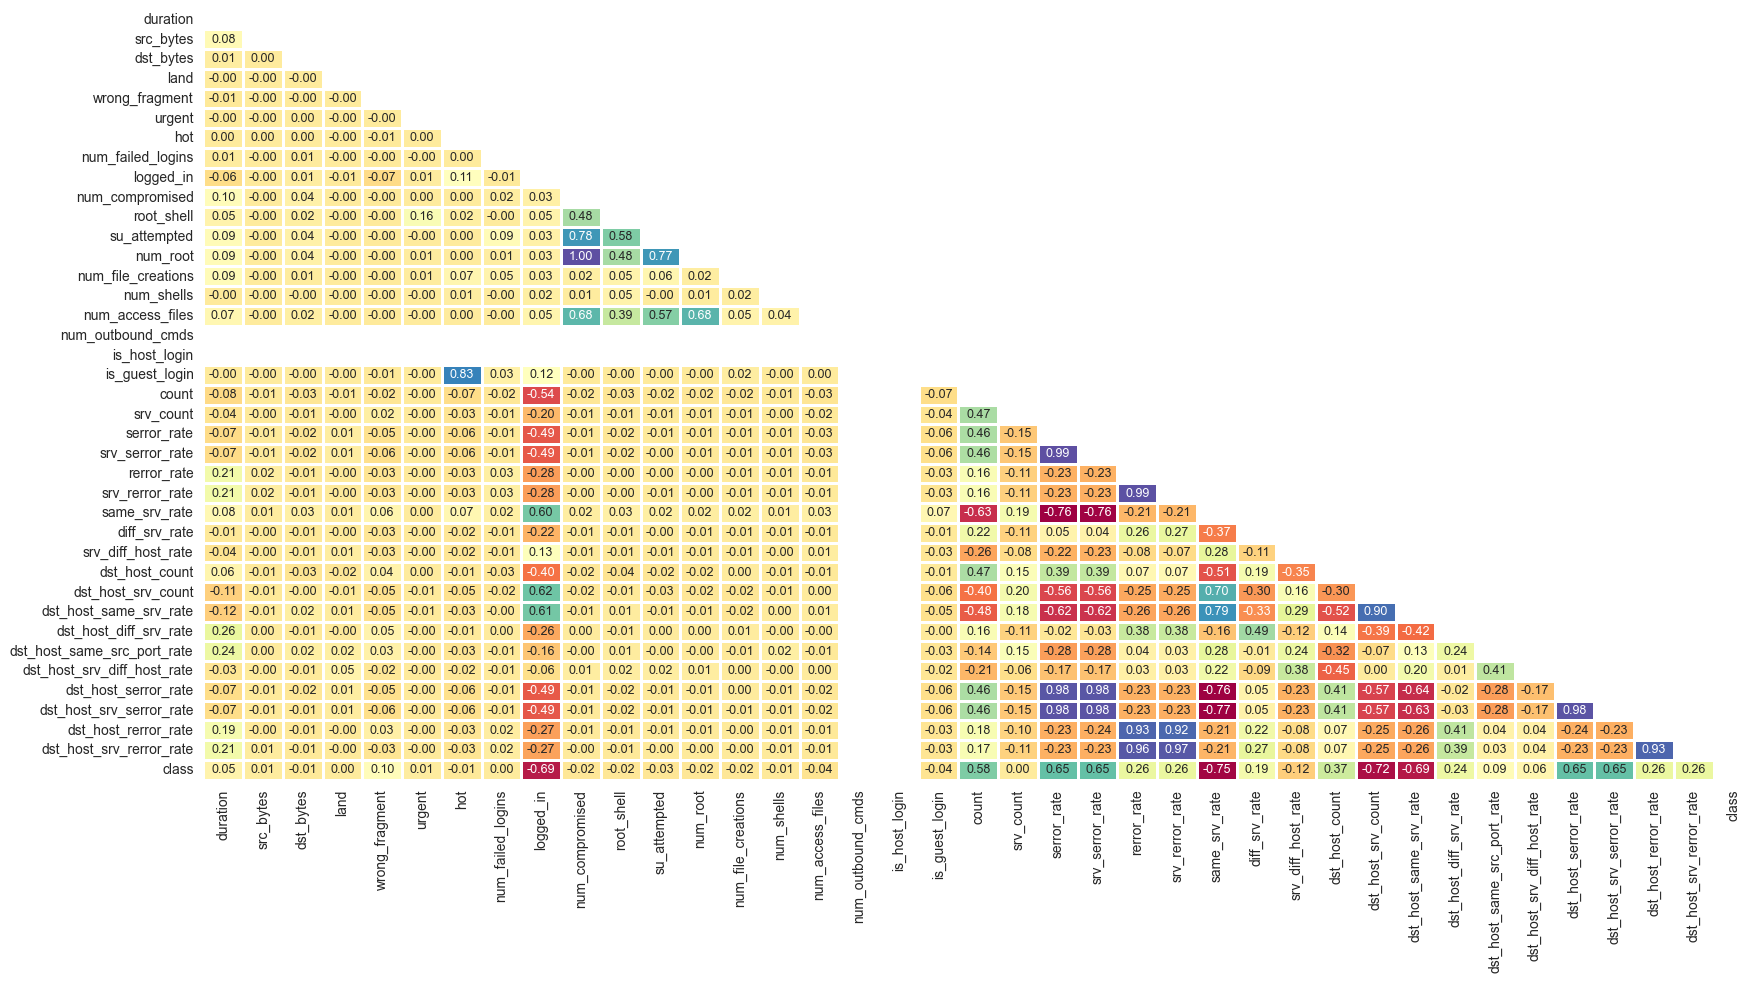

In [22]:
plt.figure(figsize = (20,10))
sns.set_style('white')
sns.heatmap(df_num.corr(), mask=np.triu(np.ones_like(df_num.corr(), dtype=bool)), linewidths=2, annot=True, fmt=".2f", annot_kws={"size": 9}, cbar=False, cmap='Spectral')
plt.show()

### Korelácia voči cieľovému atribútu

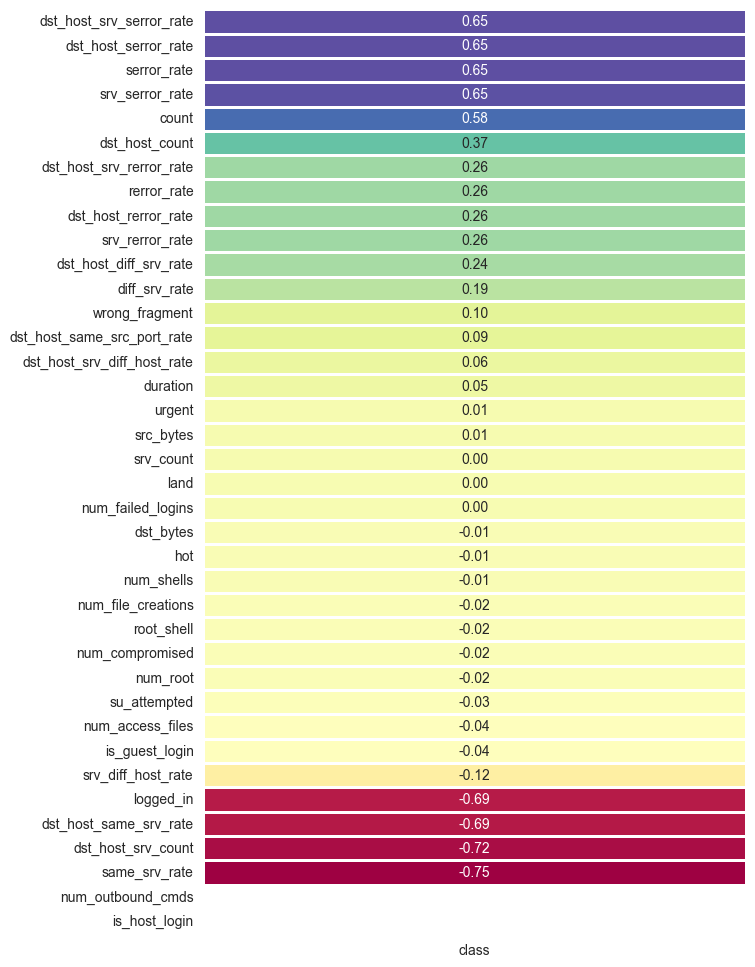

In [23]:
corr = df_num.corr()
target_corr = corr['class'].drop('class')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

plt.figure(figsize=(7,12))
sns.heatmap(target_corr_sorted.to_frame(), cmap="Spectral", annot=True, fmt='.2f', linewidths=2, cbar=False)
plt.show()

In [17]:
print(df['num_outbound_cmds'].unique().sum())

0


In [18]:
print(df['is_host_login'].unique().sum())

0


### Kontingenčná tabuľka

In [19]:
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            print(f"Contingency Table for {col1} and {col2}:\n", contingency_table, "\n")

Contingency Table for protocol_type and service:
 service        IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  ctf  daytime  \
protocol_type                                                                 
icmp             0    0       0     0    0        0         0    0        0   
tcp             40   22     172   189  146      164       111  127      107   
udp              0    0       0     0    0        0         0    0        0   

service        discard  ...  systat  telnet  tim_i  time  urh_i  urp_i  uucp  \
protocol_type           ...                                                    
icmp                 0  ...       0       0      2     0      4    124     0   
tcp                105  ...      88     483      0   155      0      0   157   
udp                  0  ...       0       0      0     0      0      0     0   

service        uucp_path  vmnet  whois  
protocol_type                           
icmp                   0      0      0  
tcp                  133    10

### Pairplot

### Outliers